<a href="https://colab.research.google.com/github/rayhannasrulloh/ai-clean-manga-ocr/blob/main/manga_ocr.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# --- STEP 1: INSTALL (Hanya butuh sekali jalan) ---
# Kita install EasyOCR (lebih modern dan stabil daripada keras-ocr)
!pip install -q easyocr opencv-python-headless matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 44.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 180.7/180.7 kB 22.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 300.6/300.6 kB 32.5 MB/s eta 0:00:00


In [ ]:


import matplotlib.pyplot as plt
import easyocr
import cv2
import numpy as np
import requests
from PIL import Image
from io import BytesIO

print("Library berhasil diinstall. Siap digunakan!")

Library berhasil diinstall. Siap digunakan!


In [ ]:
# --- STEP 2: FUNGSI CLEANING ---

def download_image(url):
    response = requests.get(url)
    img = Image.open(BytesIO(response.content)).convert('RGB')
    return np.array(img)

def clean_manga_text_easyocr(image_input):
    # 1. Initialize Reader (Menggunakan GPU jika ada)
    # Kita set bahasa ke 'en' (English) atau 'ch_tra' (Traditional Chinese) / 'ja' (Japanese)
    # Untuk manga raw jepang, ganti ['en'] menjadi ['ja']
    reader = easyocr.Reader(['ja', 'ja'], gpu=True)

    print("Mendeteksi teks...")
    # 2. Detect Text
    results = reader.readtext(image_input)

    # 3. Create Mask
    mask = np.zeros(image_input.shape[:2], dtype="uint8")

    for (bbox, text, prob) in results:
        # bbox adalah koordinat kotak teks
        (tl, tr, br, bl) = bbox

        # Konversi ke format integer untuk OpenCV
        pts = np.array([tl, tr, br, bl], np.int32)
        pts = pts.reshape((-1, 1, 2))

        # Gambar kotak putih di masker (area yang akan dihapus)
        cv2.fillPoly(mask, [pts], (255, 255, 255))

    # Perbesar sedikit area masker agar tinta di pinggir teks ikut terhapus
    kernel = np.ones((5, 5), np.uint8)
    mask = cv2.dilate(mask, kernel, iterations=2)

    print("Menghapus teks...")
    # 4. Inpainting (Menambal area putih dengan warna sekitar)
    # Radius 7 pixel
    cleaned_img = cv2.inpaint(image_input, mask, 7, cv2.INPAINT_TELEA)

    return image_input, mask, cleaned_img

Mendeteksi teks...
Menghapus teks...


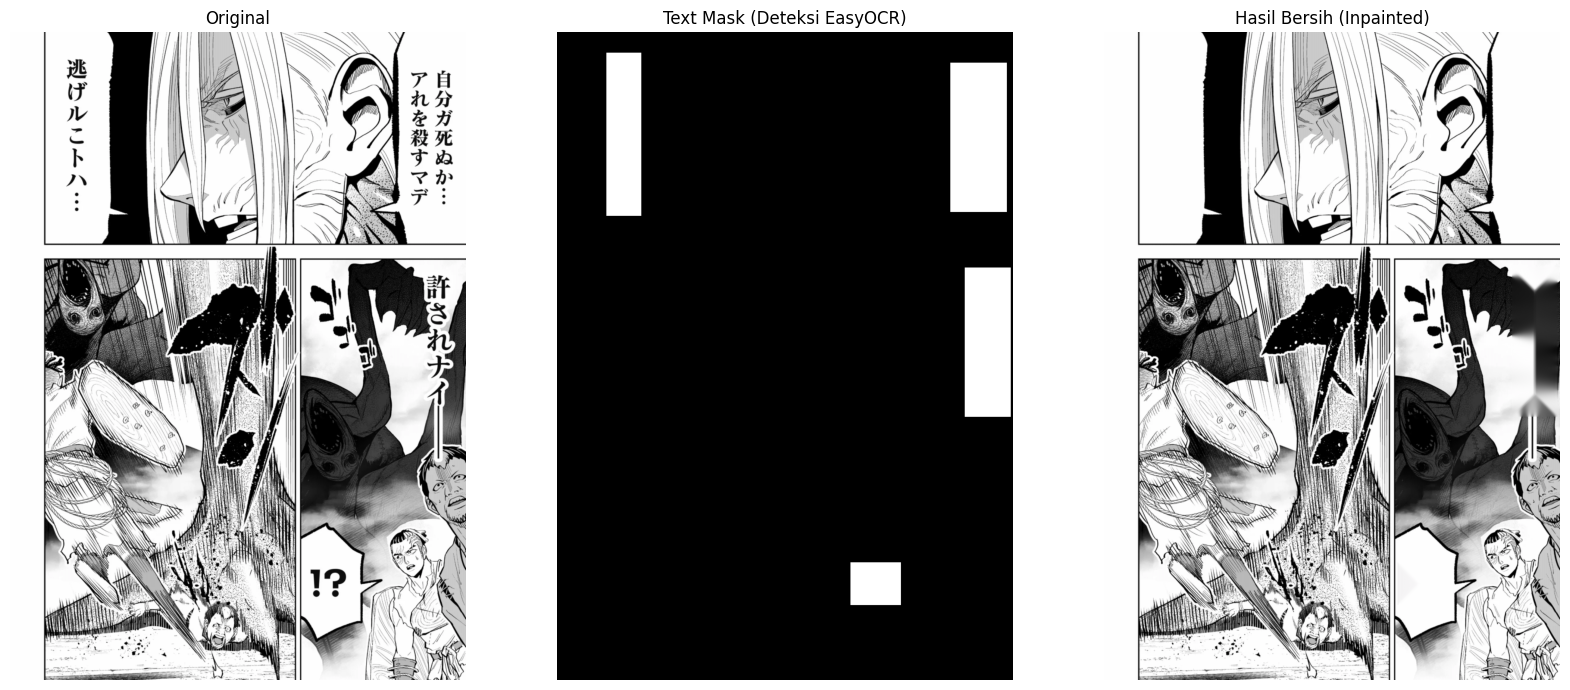

Selesai! Teks sudah dihapus.


In [ ]:
# --- STEP 3: EKSEKUSI ---

# Masukkan URL gambar manga di sini
url = 'https://raw.githubusercontent.com/rayhannasrulloh/ai-clean-manga-ocr/b3bbddbd6af4c687d019b0f484737d804ad9f173/04.png'

# Load gambar
original_img = download_image(url)

# Proses
try:
    ori, mask_result, clean_result = clean_manga_text_easyocr(original_img)

    # --- VISUALISASI HASIL ---
    fig, axs = plt.subplots(1, 3, figsize=(20, 10))

    axs[0].imshow(ori)
    axs[0].set_title('Original')
    axs[0].axis('off')

    axs[1].imshow(mask_result, cmap='gray')
    axs[1].set_title('Text Mask (Deteksi EasyOCR)')
    axs[1].axis('off')

    axs[2].imshow(clean_result)
    axs[2].set_title('Hasil Bersih (Inpainted)')
    axs[2].axis('off')

    plt.show()
    print("Selesai! Teks sudah dihapus.")

except Exception as e:
    print(f"Terjadi error: {e}")

In [ ]:
# Install library EasyOCR (untuk deteksi teks) dan Simple-LaMa (untuk inpainting canggih)
!pip install -q easyocr simple-lama-inpainting opencv-python-headless matplotlib

print("Instalasi selesai. Sedang mendownload model AI...")

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.3/88.3 kB 5.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.5/50.5 MB 25.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.0/50.0 MB 19.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.0/63.0 MB 11.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.0/15.0 MB 75.9 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
dopamine-rl 4.1.2 requires tensorflow>=2.2.0, which is not installed.
keras-hub 0.21.1 requires keras>=3.5, which is not installed.
tensorflow-decision-forests 1.12.0 requires tensorflow==2.19.0, which is not installed.
jax 0.7.2 requires numpy>=2.0, but you have numpy 1.26.4 which is incompatible.
shap 0.50.0 requires numpy>=2, but you have n

In [ ]:
import matplotlib.pyplot as plt
import easyocr
import cv2
import numpy as np
import requests
from PIL import Image
from io import BytesIO
from simple_lama_inpainting import SimpleLama

# --- 1. PERSIAPAN AI ---
print("Sedang memuat model ke GPU...")
# Load EasyOCR (Mata)
reader = easyocr.Reader(['en', 'ja'], gpu=True)
# Load LaMa (Tangan Pelukis)
lama_cleaner = SimpleLama()
print("Model siap!")

Sedang memuat model ke GPU...


Downloading: "https://github.com/enesmsahin/simple-lama-inpainting/releases/download/v0.1.0/big-lama.pt" to /root/.cache/torch/hub/checkpoints/big-lama.pt
100%|██████████| 196M/196M [00:00<00:00, 216MB/s]


Model siap!


In [ ]:
# --- 2. FUNGSI UTAMA ---

def download_image(url):
    response = requests.get(url)
    img = Image.open(BytesIO(response.content)).convert('RGB')
    return np.array(img)

def generate_mask(image_input):
    """
    Fungsi ini cuma bertugas mencari teks dan membuat 'Peta' (Mask).
    """
    # Deteksi teks
    results = reader.readtext(image_input)

    # Buat kanvas hitam kosong seukuran gambar
    mask = np.zeros(image_input.shape[:2], dtype="uint8")

    for (bbox, text, prob) in results:
        (tl, tr, br, bl) = bbox
        pts = np.array([tl, tr, br, bl], np.int32)
        pts = pts.reshape((-1, 1, 2))
        cv2.fillPoly(mask, [pts], 255) # Warna putih (255) untuk area teks

    # DILATION: Perlebar sedikit area masker agar sisa-sisa pinggiran huruf kena hapus
    # Semakin besar angkanya, semakin lebar area yang dihapus
    kernel = np.ones((10, 10), np.uint8)
    mask = cv2.dilate(mask, kernel, iterations=3)

    return mask

def clean_with_lama(image_input):
    """
    Fungsi utama penggabungan EasyOCR + LaMa
    """
    print("1. Mendeteksi teks...")
    mask = generate_mask(image_input)

    print("2. AI sedang menggambar ulang (Inpainting)...")
    # Konversi ke format PIL Image karena library simple-lama butuh format itu
    image_pil = Image.fromarray(image_input)
    mask_pil = Image.fromarray(mask)

    # PROSES AJAIB LAMA DISINI
    result_pil = lama_cleaner(image_pil, mask_pil)

    return image_input, mask, np.array(result_pil)

1. Mendeteksi teks...
2. AI sedang menggambar ulang (Inpainting)...


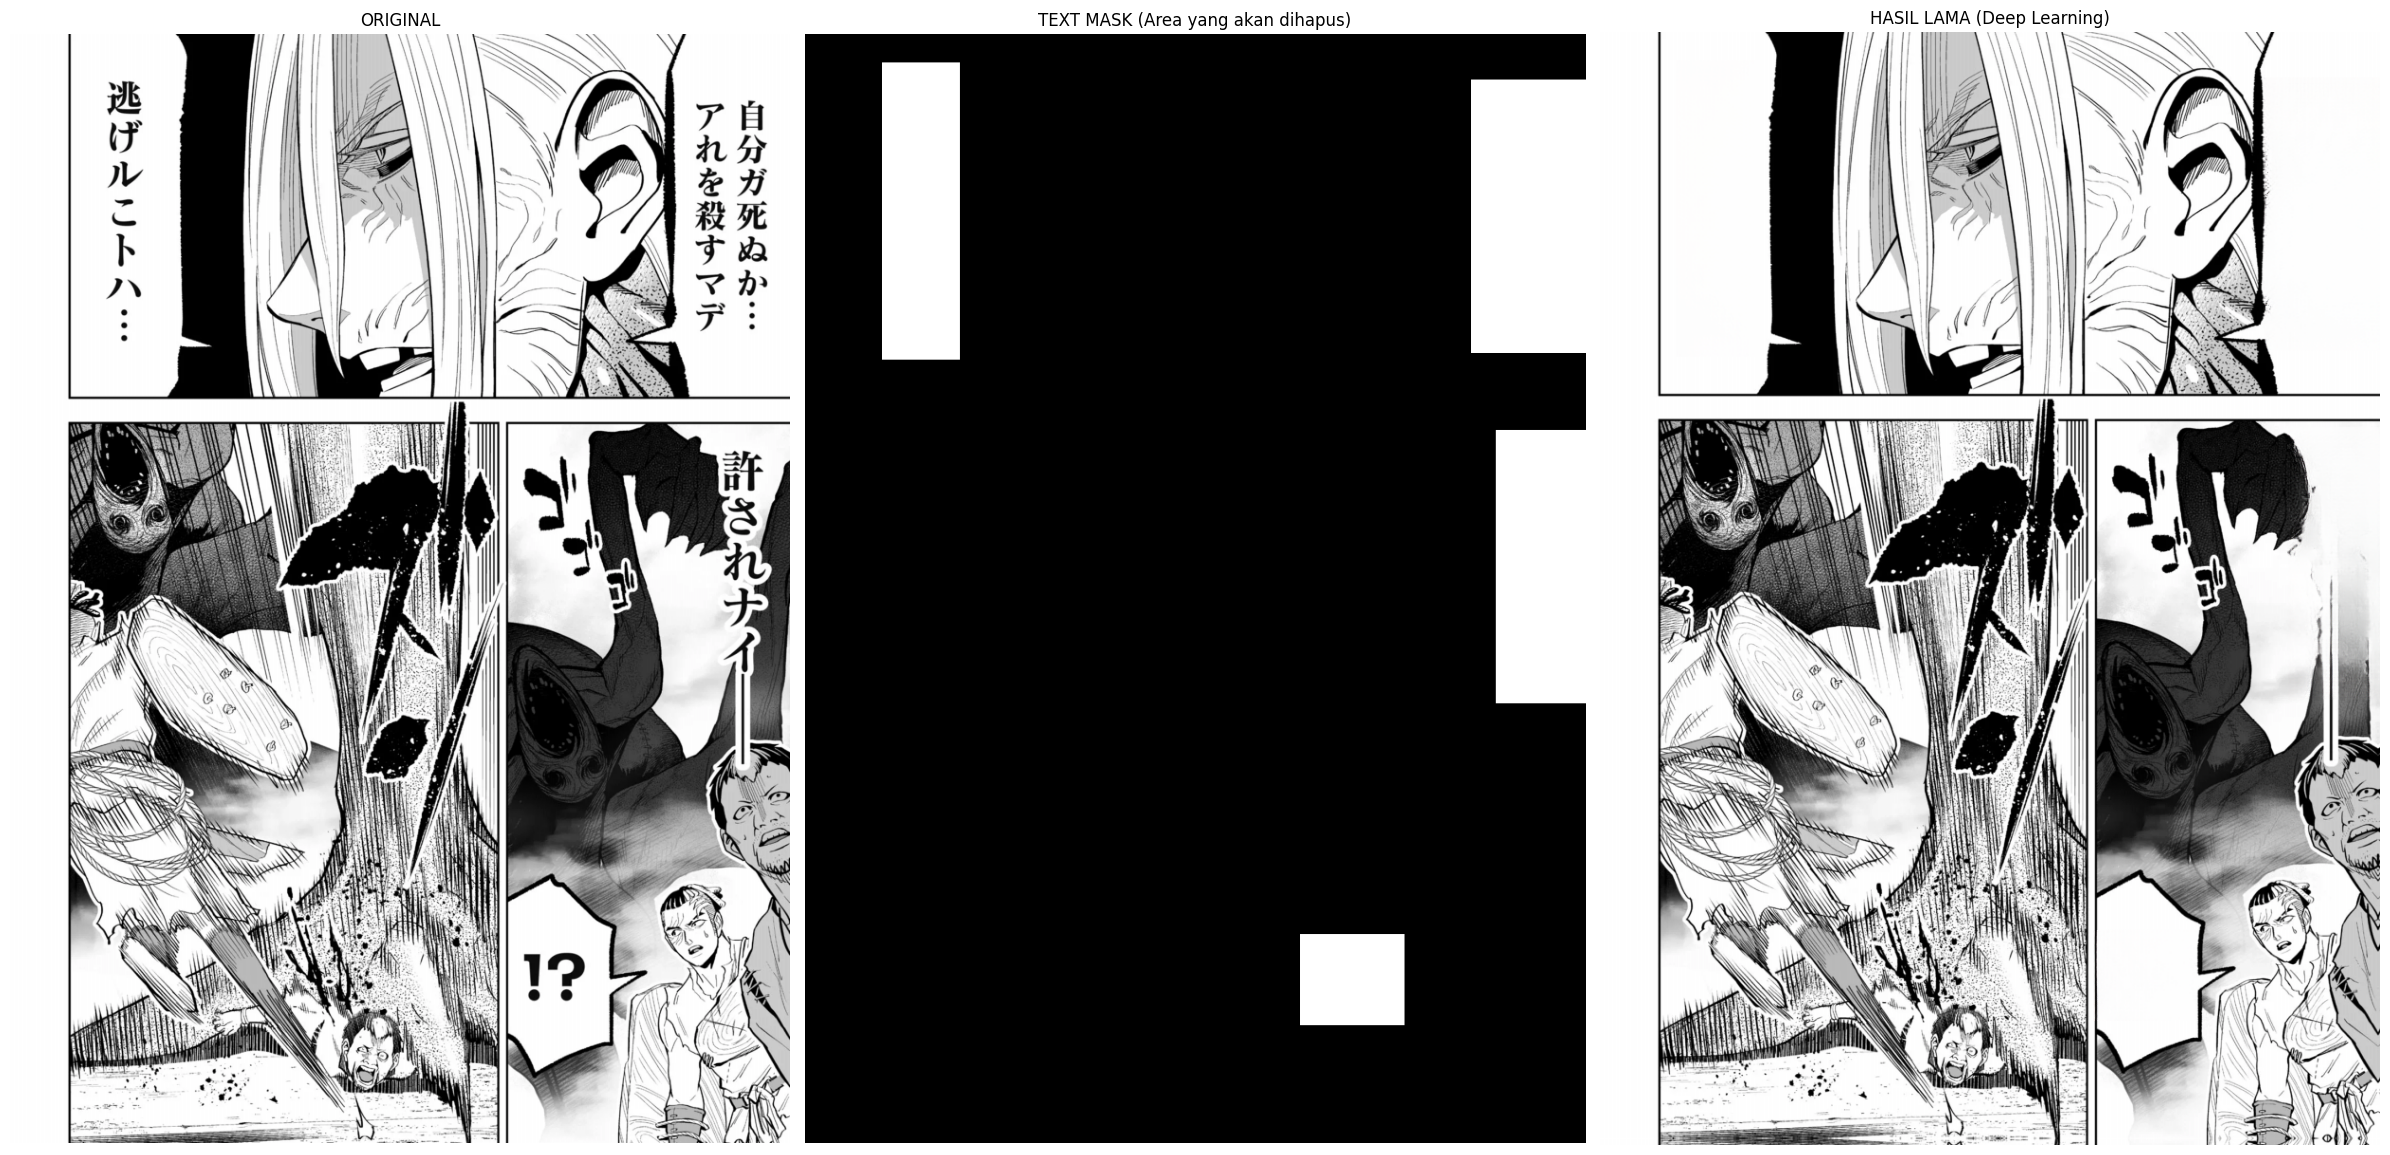

Selesai! Bandingkan bagian rambut/wajah dengan hasil sebelumnya.


In [ ]:
# --- 3. EKSEKUSI ---

# URL Gambar Manga (Pakai yang tadi agar kita bisa bandingkan hasilnya)
url = 'https://raw.githubusercontent.com/rayhannasrulloh/ai-clean-manga-ocr/b3bbddbd6af4c687d019b0f484737d804ad9f173/04.png'

try:
    # Download
    original_img = download_image(url)

    # Proses Cleaning
    original, mask_result, clean_result = clean_with_lama(original_img)

    # --- 4. VISUALISASI ---
    fig, axs = plt.subplots(1, 3, figsize=(24, 12)) # Kita perbesar ukuran tampilannya

    # Gambar Asli
    axs[0].imshow(original)
    axs[0].set_title('ORIGINAL')
    axs[0].axis('off')

    # Masker (Apa yang dilihat AI sebagai teks)
    axs[1].imshow(mask_result, cmap='gray')
    axs[1].set_title('TEXT MASK (Area yang akan dihapus)')
    axs[1].axis('off')

    # Hasil Akhir
    axs[2].imshow(clean_result)
    axs[2].set_title('HASIL LAMA (Deep Learning)')
    axs[2].axis('off')

    plt.tight_layout()
    plt.show()
    print("Selesai! Bandingkan bagian rambut/wajah dengan hasil sebelumnya.")

except Exception as e:
    print(f"Error: {e}")

In [ ]:
# 1. Install Gradio (Library UI untuk ML)
!pip install -q gradio

In [ ]:


import gradio as gr
import numpy as np
from PIL import Image

print("Gradio terinstall. Menyiapkan antarmuka web...")

# 2. Wrapper Function
# Gradio butuh fungsi yang menerima Input (Gambar) dan mengeluarkan Output (Gambar)
def process_manga_gradio(input_image):
    if input_image is None:
        return None

    # Panggil fungsi 'magic' kita yang tadi
    # Ingat: clean_with_lama mengembalikan 3 hal: (original, mask, result)
    # Kita cuma butuh yang ke-3 (result) untuk ditampilkan ke user
    _, _, cleaned_result = clean_with_lama(input_image)

    return cleaned_result

# 3. Bikin UI-nya
with gr.Interface(
    fn=process_manga_gradio, # Fungsi otaknya
    inputs=gr.Image(label="Upload Halaman Manga", type="numpy"), # Input
    outputs=gr.Image(label="Hasil Bersih (Cleaned)", type="numpy"), # Output
    title="✨ AI Manga Cleaner (LaMa + EasyOCR)",
    description="Upload gambar manga raw (Jepang/Inggris), AI akan otomatis menghapus teksnya dan menggambar ulang latar belakangnya.",
    allow_flagging="never"
) as demo:

    # 4. LAUNCH!
    # share=True artinya Google akan bikin 'terowongan' (tunnel)
    # supaya localhost kamu bisa diakses orang lain lewat internet publik
    demo.launch(share=True, debug=True)

Gradio terinstall. Menyiapkan antarmuka web...


/usr/local/lib/python3.12/dist-packages/gradio/interface.py:415: UserWarning: The `allow_flagging` parameter in `Interface` is deprecated. Use `flagging_mode` instead.
  warnings.warn(


Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
* Running on public URL: https://bb9ddaab48ef0af472.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


1. Mendeteksi teks...
2. AI sedang menggambar ulang (Inpainting)...
1. Mendeteksi teks...
2. AI sedang menggambar ulang (Inpainting)...
